# Importing Jupyter modules

In [1]:
from IPython.display import display

# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data
Put both train and test csv files from Kaggle inside **data** folder which in turn should be in the folder where your **notebook resides**.

In [3]:
train_df = pd.read_csv("data/train.csv")
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test_df = pd.read_csv("data/test.csv")
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


# Check details of the data frames

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Drop columns
PassengerId is just a serial number of passengers and does not carry any meaning.  
We will not be using Name for now.  
Cabin features is too *sparse*.  
Fare features was not used to finish the workshop on time. But, you are encouraged to use it in your model.

In [7]:
to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Fare"]

In [8]:
train2 = train_df.drop(to_drop, axis=1)
test2 = test_df.drop(to_drop, axis=1)

In [9]:
train2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [10]:
test2.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S


# Check Null Embarked

In [11]:
train2[train2["Embarked"].isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


# Fill with highest embarked

In [12]:
most_embarked = train2["Embarked"].mode()[0]
most_embarked

'S'

In [13]:
train2["Embarked"] = train2["Embarked"].fillna(most_embarked)

# Recheck Null Embarked

In [14]:
train2[train2["Embarked"].isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


# Check Null Age

In [15]:
len(train2[train2["Age"].isnull()])

177

In [16]:
len(test2[test2["Age"].isnull()])

86

# Function to fill Age
Make a function because both train and test have missing ages.

In [17]:
def fill_age(df):
    for s in ["male", "female"]:
            for c in [1, 2, 3]:
                truth_table = (df["Sex"] == s) & (df["Pclass"] == c)
                temp_df = df[truth_table]["Age"].dropna()
                median_age = temp_df.median()
                df.loc[(df.Age.isnull()) & (df.Sex == s) & (df.Pclass == c),"Age"] = median_age

In [18]:
fill_age(train2)
fill_age(test2)

# Correlation Plot
Function to plot correlation map.

In [19]:
def show_corr(df):
    _, ax = plt.subplots(figsize=(8,6))

    # Colormap : Colors to denote correlation values
    cmap = sns.diverging_palette(250 , 10, s=68, l=40, as_cmap = True )

    # Plotting heatmap using seaborn
    sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)

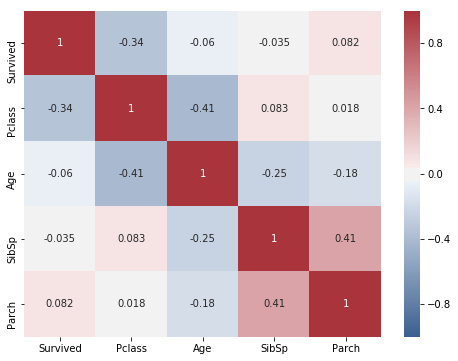

In [20]:
show_corr(train2)

# Convert features to numerical
For now do not use one-hot encoding

In [21]:
num_mapper = {
                "Embarked" : {'C' : 1, 'S': 2, 'Q' : 3},
                "Sex"      : {'male' : 1, 'female': 2},
            }
train2 = train2.replace(num_mapper)
test2 = test2.replace(num_mapper)

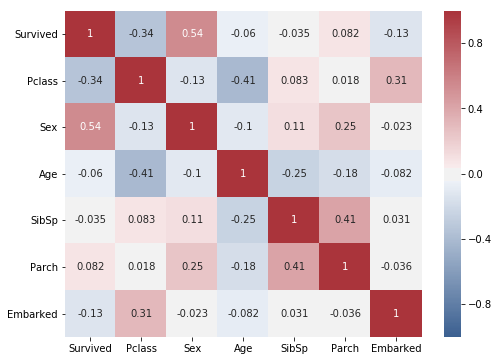

In [22]:
show_corr(train2)

# Create X (Features) and Y (Labels)

In [23]:
train2_x = train2.drop(["Survived"], axis=1)
train2_x.tail(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked
888,3,2,21.5,1,2,2
889,1,1,26.0,0,0,1
890,3,1,32.0,0,0,3


In [24]:
train2_y = train2["Survived"]
train2_y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

# Testing Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state = 12)
clf_rf.fit(train2_x, train2_y)
clf_rf.score(train2_x, train2_y)

0.9259259259259259

# Function to convert predictions to appropriate csv file
This function takes the original **test** data frame, the **predictions list**, a **filename** to save the csv file and **save** flag to determine if the csv file should be saved.

In [26]:
def kgl_submit_csv(df, predictions, savename = "my_predictions.csv", save=False):
    print("Number of predictions:", len(predictions))
    print("Number of passengers", len(df["PassengerId"]))
    
    kgl_df = pd.DataFrame({
        "PassengerId" : df["PassengerId"],
        "Survived" : predictions
    })
    
    if save:
        kgl_df.to_csv(savename, index=False)
    
    return kgl_df

In [27]:
predictions2 = clf_rf.predict(test2)

In [28]:
_ = kgl_submit_csv(test_df, predictions2, savename= "pred2.csv", save=True)

Number of predictions: 418
Number of passengers 418


# Verdict
.  
.  
.  
.  
Kaggle score = 74.641%

# Using Keras Fully Connected Layers

## Importing Keras Modules

In [29]:
from keras.models import Sequential
from keras.layers import Dense

/opt/anaconda3/envs/ktf-cv3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Convert DataFrame to 2d array

In [30]:
trainx = train2_x.values
trainx

array([[ 3. ,  1. , 22. ,  1. ,  0. ,  2. ],
       [ 1. ,  2. , 38. ,  1. ,  0. ,  1. ],
       [ 3. ,  2. , 26. ,  0. ,  0. ,  2. ],
       ...,
       [ 3. ,  2. , 21.5,  1. ,  2. ,  2. ],
       [ 1. ,  1. , 26. ,  0. ,  0. ,  1. ],
       [ 3. ,  1. , 32. ,  0. ,  0. ,  3. ]])

In [31]:
trainy = train2_y.values

## Create a Fully Connected ANN Architecture
There are 2 layers in our network:  
1. A hidden layer
2. An output layer  

The first parameter to Dense is the number of nodes which in our case is 8 for the 1st one and 1 for the output node.  
The input_dim is the number of features of the data.  
Rectified Linear Unit is used activation for the hidden layer and Sigmoid for the output layer

In [32]:
# Initializing model
model = Sequential()

# Adding hidden layer
model.add(Dense(8, input_dim=6, activation='relu'))

# Adding output layer
model.add(Dense(1, activation='sigmoid'))

## Assign Loss function, Optimizer and Accuracy Metrics
We use **binary crossentropy** function to calculate the loss because this is a binary classfication problem i.e. Survived takes two values either 1 or 0.  
We use **Adam** optimizer which is an advance version of **Gradient Descent**.  
Finally, we add additional metrics we want to observe which in our case is the **Accuarcy**.

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Start the training
We set 40 **epochs** which means there will be 40 sets of forward and backward propagations.
We use 40 **batch size** which means we will iteratively use 40 rows of data one after another per epoch rather than taking the whole data simultaneously.  
We set aside 10% of total data as specified by 0.1 **validation_split** to perform validation.  
We set **shuffle** False which means the data will not be shuffler after each epoch.

In [34]:
history_object = model.fit(trainx, trainy, epochs=40, batch_size=40, 
                           verbose=2, validation_split=0.1, 
                           shuffle=False)

Train on 801 samples, validate on 90 samples
Epoch 1/40
 - 0s - loss: 1.2503 - acc: 0.5980 - val_loss: 1.1152 - val_acc: 0.5778
Epoch 2/40
 - 0s - loss: 0.9442 - acc: 0.5993 - val_loss: 0.8561 - val_acc: 0.5667
Epoch 3/40
 - 0s - loss: 0.7415 - acc: 0.6042 - val_loss: 0.7256 - val_acc: 0.5778
Epoch 4/40
 - 0s - loss: 0.6708 - acc: 0.6117 - val_loss: 0.6884 - val_acc: 0.5889
Epoch 5/40
 - 0s - loss: 0.6502 - acc: 0.6092 - val_loss: 0.6582 - val_acc: 0.5667
Epoch 6/40
 - 0s - loss: 0.6357 - acc: 0.6092 - val_loss: 0.6366 - val_acc: 0.5889
Epoch 7/40
 - 0s - loss: 0.6245 - acc: 0.6155 - val_loss: 0.6186 - val_acc: 0.6000
Epoch 8/40
 - 0s - loss: 0.6117 - acc: 0.6230 - val_loss: 0.5951 - val_acc: 0.6222
Epoch 9/40
 - 0s - loss: 0.5999 - acc: 0.6392 - val_loss: 0.5776 - val_acc: 0.6889
Epoch 10/40
 - 0s - loss: 0.5915 - acc: 0.6604 - val_loss: 0.5661 - val_acc: 0.7222
Epoch 11/40
 - 0s - loss: 0.5849 - acc: 0.6829 - val_loss: 0.5571 - val_acc: 0.7444
Epoch 12/40
 - 0s - loss: 0.5789 - acc: 

## Function to visualize training loss

In [35]:
def visualize_loss(history_obj, show=False, save=True, x=10, y=10):

    plt.figure(figsize=(x, y))
    plt.plot(history_obj.history['loss'])
    plt.plot(history_obj.history['val_loss'])
    plt.title(' Model Loss Visualization')
    plt.ylabel('Mean Squared Error Loss')
    plt.xlabel('Epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.grid()

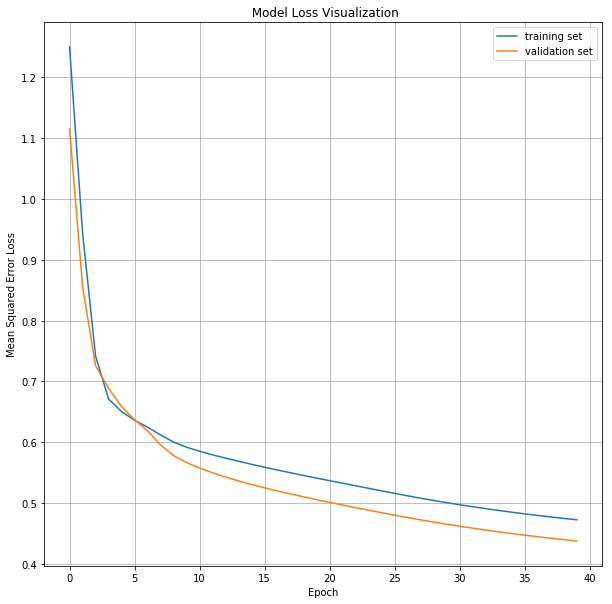

In [36]:
visualize_loss(history_object)

## Function to save Keras predictions

In [37]:
def kgl_submit_csv_keras(df, predictions, savename = "my_predictions.csv", save=False):
    print("Number of predictions:", len(predictions))
    print("Number of passengers", len(df["PassengerId"]))
    
    kgl_df = pd.DataFrame({
        "PassengerId" : df["PassengerId"],
        "Survived" : predictions.reshape(-1)
    })
    
    kgl_df.loc[kgl_df["Survived"]>=0.5, "Survived"]= 1
    kgl_df.loc[kgl_df["Survived"]<0.5, "Survived"]= 0
    kgl_df["Survived"] = np.array(kgl_df["Survived"]).astype(int)

    if save:
        kgl_df.to_csv(savename, index=False)    
        
#     return kgl_df

In [38]:
predictions_k = model.predict(test2.values)

In [39]:
kgl_submit_csv_keras(test_df, predictions_k, savename="pred_keras.csv", save=True)

Number of predictions: 418
Number of passengers 418


# Verdict
.  
.  
.  
.  
.  
Kaggle score = 76.076 %